In [ ]:
# Notebook adapted from Jeremy P. Howard

In [19]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [20]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

<p>Square error is square of difference between predicted and actual data values</p>
Define predicted: ${\hat y} $ and actual:${y}$ 
<p>Loss is:</p>
$({\hat y}-{y})^2$
<p>Previous definition y as linear_function</p>
${\hat y=\alpha + \beta x}$
<p>To minmize the Loss we take the derivative of the loss wrt alpha and beta, not x. x and y are datapoints
which is our dataset we are trying to fit to. The derivative of y is the sum of the partial derivatives of the dependent variables
which in this case are alpha and beta. </p>
<p></p>
$derivative(loss)=\cfrac{\partial(loss)}{\partial \alpha} + \cfrac{\partial(loss)}{\partial \beta}$
<p></p>
$\cfrac{\partial(loss)}{\partial \alpha}=\cfrac{(\hat y - y)^2}{\partial \alpha}=\cfrac{2*(\hat y-y)*\partial(\hat y - y)}{\partial \alpha}$
<p>Using:</p>
$\cfrac{\partial \hat y}{\partial \alpha}=1$ 
<p>and</p>
$\cfrac{\partial y}{\partial \alpha}=0$
<p>the derivative of loss wrt alpha for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \alpha}=2(\hat y-y)$
<p>The derivative of loss WRT beta starts as:</p>  
$\cfrac{\partial(loss)}{\partial \beta}=\cfrac{(\hat y - y)^2}{\partial \beta}=\cfrac{2*(\hat y-y)}{\partial \beta}*\cfrac{\partial(\hat y -y)}{\partial \beta}$
<p></p>
$\cfrac{\partial \hat y}{\partial \beta}=x$ and
$\cfrac{\partial y}{\partial \beta}=0$
<p>the derivative of loss wrt beta for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \beta}=2x*(\hat y-y)$


In [21]:
def update_alpha_and_beta():
    global alpha, beta
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

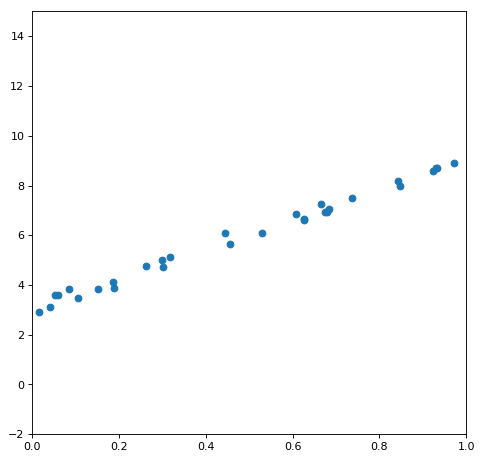

In [22]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [23]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [24]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('linear_animation.mp4', writer=writer)

In [25]:
print('Done linear animation')

Done linear animation


$y=\gamma x^2 + \beta x + \alpha$
<p></p>
$\cfrac{\partial(loss)}{\partial \gamma}=2x^2(\hat y-y)$
$\cfrac{\partial(loss)}{\partial \beta}=2x(\hat y -y)$
$\cfrac{\partial(loss)}{\partial \alpha}=2(\hat y-y)$


<h6>Squared Function</h6>

In [26]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic
def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

beta_true = 2.0
alpha_true = 2.0
gamma_true = 10.0

n = 300
x = random(n)
y = square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01

In [27]:
def update_squared():
    global gamma, alpha, beta
    y_predicted = square_function(gamma,beta,alpha,x)
    derivative_of_loss_wrt_gamma = 2*x**2*(y_predicted-y)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate * derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = square_function(gamma,beta,alpha,x)
    line.set_data(x,y)
    for i in range(20): 
        update_squared()
    return (line,)

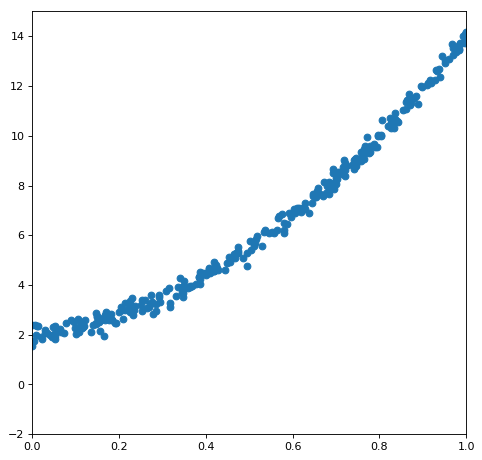

In [28]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [29]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [30]:
#%matplotlib inline
resulting_animation

In [31]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('squared_animation.mp4', writer=writer)

In [32]:
print('Done squared animation')

Done squared animation


<h6>SGD</h6>

In [6]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


def linear_function(alpha,beta,x): return alpha+beta*x
beta_true = 6.0
alpha_true = 3.0
n = 30
x_data = random(n)
y_data = linear_function(alpha_true,beta_true,x_data)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.1
num_iters=10

In [7]:
print(x_data)
print("-----")
print(y_data)

[0.89651284 0.68983679 0.86404787 0.5808972  0.10565706 0.82049396
 0.65702753 0.07364167 0.38395776 0.41543906 0.77656385 0.94117423
 0.13783997 0.11729716 0.21603972 0.06938033 0.73940375 0.08267635
 0.82860302 0.1719493  0.34090574 0.14121324 0.02118051 0.62581458
 0.79971078 0.15539485 0.62473423 0.16403519 0.80296291 0.37942547]
-----
[8.01360467 7.05360054 8.38301972 6.51367984 3.80502867 8.08120816
 6.8243162  3.68803357 5.2804276  5.42636923 7.78311236 8.36017851
 3.73928225 3.65319919 4.25523113 3.41440187 7.58758027 3.32019368
 7.94675092 3.76048755 5.1268488  3.75035749 3.23523185 6.7294111
 8.0299383  3.70208179 6.68194658 4.05417557 7.60501804 5.45686954]


In [2]:
#SGD requires a batch size of 1 
def update_alpha_and_beta():
    global alpha, beta
    for i in range(n):
        print("i:",i)
        y_predicted_batch = linear_function(alpha,beta,x_data[i])
        derivative_of_loss_wrt_alpha = 2*(y_predicted_batch-y_data[i])
        derivative_of_loss_wrt_beta = x_data[i]* derivative_of_loss_wrt_alpha
        print("before iters","alpha:",alpha,"beta:",beta)
        for _ in range(num_iters):
            #print("y_predicted_batch:",y_predicted_batch)
            #print("x_batch:",x_batch,"y_batch:",y_batch)
            #print("learning_rate:",learning_rate)
            #print("2*learning_rate*(y_predicted_batch-y_batch)",2*learning_rate*(y_predicted_batch-y_batch))
            #print("2*x_batch*(y_predicted_batch-y_batch)",2*x_batch*(y_predicted_batch-y_batch))
            alpha = alpha - 2*learning_rate*(y_predicted_batch-y_data[i])
            beta = beta - learning_rate*2*x_data[i]*(y_predicted_batch-y_data[i])
            y_predicted_batch = linear_function(alpha,beta,x_data[i])
        print("after iters","alpha:",alpha,"beta:",beta)
def animate():
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    #for _ in range(20):
    update_alpha_and_beta()
    return (line,)

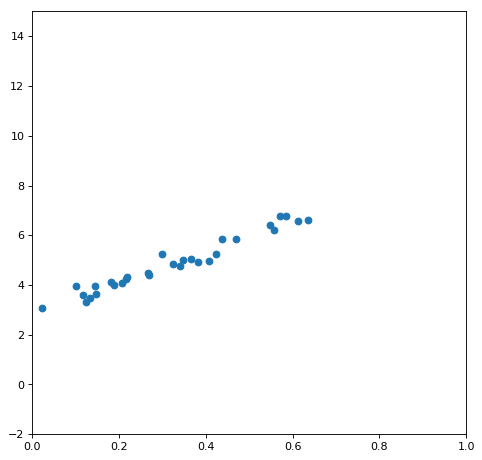

In [5]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x_data,y_data)
line, = ax.plot([],[],lw=2)

In [4]:
for _ in range(3):
    animate()
    

i: 0
before iters alpha: 3.0 beta: -1.0
after iters alpha: 5.742815231555843 beta: 0.5304974531877359
i: 0
before iters alpha: 5.742815231555843 beta: 0.5304974531877359
after iters alpha: 5.87377906376032 beta: 0.6035755844969898
i: 0
before iters alpha: 5.87377906376032 beta: 0.6035755844969898
after iters alpha: 5.880032319593362 beta: 0.6070649161940338
i: 0
before iters alpha: 5.880032319593362 beta: 0.6070649161940338
after iters alpha: 5.8803308998032975 beta: 0.6072315246646375
i: 0
before iters alpha: 5.8803308998032975 beta: 0.6072315246646375
after iters alpha: 5.880345156399244 beta: 0.6072394798792422
i: 0
before iters alpha: 5.880345156399244 beta: 0.6072394798792422
after iters alpha: 5.880345837122618 beta: 0.6072398597245118
i: 0
before iters alpha: 5.880345837122618 beta: 0.6072398597245118
after iters alpha: 5.88034586962577 beta: 0.6072398778613491
i: 0
before iters alpha: 5.88034586962577 beta: 0.6072398778613491
after iters alpha: 5.88034587117773 beta: 0.60723987

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
# bug here if it doesnt complete
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('SGD_animation.mp4', writer=writer)

<h6>SGD w/momentum</h6>